<h2>Manejo de valores perdidos y outliers</h2>

In [1]:
import pandas as pd
import numpy as np

# Creación de un DataFrame con valores nulos
datos = {
    'Nombre': ['Ana', 'Luis', 'Carlos', 'Sofía', np.nan],
    'Edad': [25, None, 30, 28, 22],
    'Ciudad': ['Madrid', 'Barcelona', np.nan, 'Sevilla', 'Bilbao']
}

df = pd.DataFrame(datos)
df

Nombre  Edad     Ciudad
0     Ana  25.0     Madrid
1    Luis   NaN  Barcelona
2  Carlos  30.0        NaN
3   Sofía  28.0    Sevilla
4     NaN  22.0     Bilbao

<h4>DataSet Titanic</h4>

¿De qué trata el dataset? El objetivo principal suele ser predecir qué pasajeros sobrevivieron al naufragio basándose en características como su edad, sexo, clase de boleto y si viajaban solos o acompañados.

Estas son las variables principales que contiene:
* Survived: Si sobrevivió (0 = No, 1 = Sí).
* Pclass: Clase del boleto (1ª, 2ª, 3ª).
* Sex: Sexo del pasajero.
* Age: Edad en años.
* SibSp: Número de hermanos o cónyuges a bordo.
* Parch: Número de padres o hijos a bordo.
* Fare: Tarifa del pasaje.
* Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

<h4>Ejemplo de DataFrame con Valores Perdidos</h4>

In [2]:
import pandas as pd
import numpy as np

import pandas as pd
df = pd.read_csv('data/Titanic-Dataset.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum().sum()

np.int64(866)

<h3>Visualización de valores perdidos</h3>

In [ ]:
#pip install missingno

In [7]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df, figsize=(10, 4), sparkline=False)
plt.show()

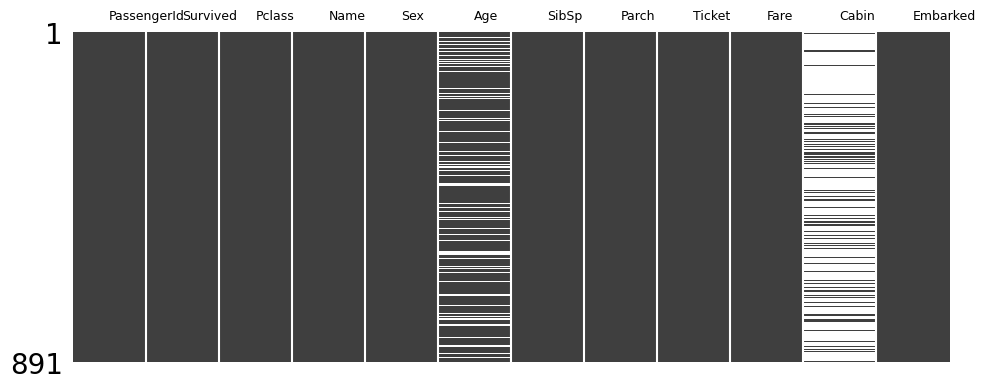

In [8]:
import missingno as msno
import matplotlib.pyplot as plt

ax = msno.matrix(df, figsize=(10, 4), sparkline=False)
ax.tick_params(axis='x', labelsize=9)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


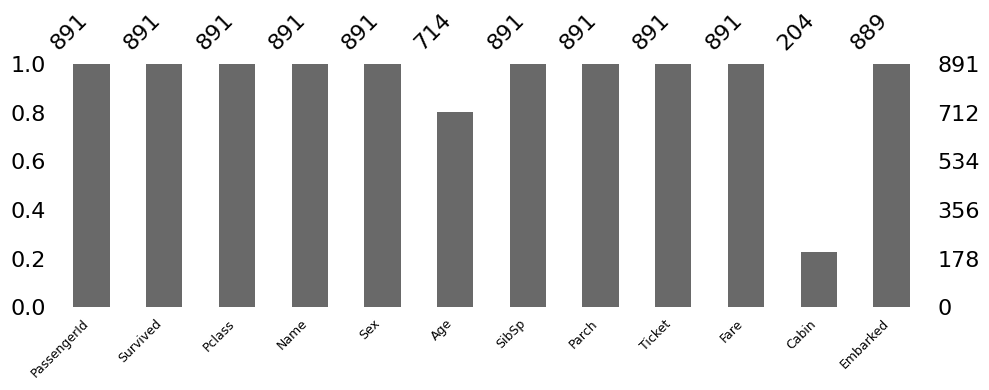

In [9]:
ax = msno.bar(df, figsize=(10, 4))
ax.tick_params(axis='x', labelsize=9)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



<h3>Patrones de valores nulos</h3>
Este gráfico de calor muestra correlaciones entre columnas con valores faltantes, lo que puede indicar relaciones en la estructura de los datos. Identificar estos patrones es fundamental para determinar la estrategia más adecuada para el tratamiento de los valores perdidos.

In [10]:
# Heatmap de Correlación de Nulidad
ax = msno.heatmap(df, figsize=(6, 4))
ax.tick_params(axis='both', labelsize=9)

for t in ax.texts:
    t.set_fontsize(8)

plt.tight_layout()
plt.show()


Es una herramienta muy útil en la fase de limpieza de datos (EDA) para entender no si faltan datos, sino cómo se relacionan las ausencias entre diferentes columnas.

A diferencia de un mapa de calor común que mide la correlación entre valores (como peso vs. altura), este mide la correlación de presencia de datos:
- Mide si el hecho de que falte un valor en la columna "Age" está relacionado con que también falte en "Cabin".

Interpretación de los Colores y Valores
El gráfico utiliza una escala que va de -1 a 1:
- 1 (Azul oscuro): Correlación positiva perfecta. Si falta un dato en la columna A, siempre falta en la columna B.
- 0 (Blanco): No hay relación aparente. Que falte un dato en una columna no nos dice nada sobre la otra.
- -1 (Rojo oscuro): Correlación negativa perfecta. Si falta un dato en la columna A, en la columna B siempre está presente (y viceversa).


<h3>Filtrado de la Data Perdida</h3>

In [11]:
df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
## Identificar valores perdidos (conteo y %)

# Conteo de nulos por columna
nulos = df.isna().sum().sort_values(ascending=False)

# Porcentaje de nulos por columna
pct_nulos = (df.isna().mean() * 100).round(2).sort_values(ascending=False)

resumen_nulos = pd.DataFrame({
    "nulos": nulos,
    "%_nulos": pct_nulos
})

print(resumen_nulos)


             nulos  %_nulos
Cabin          687    77.10
Age            177    19.87
Embarked         2     0.22
PassengerId      0     0.00
Name             0     0.00
Pclass           0     0.00
Survived         0     0.00
Sex              0     0.00
Parch            0     0.00
SibSp            0     0.00
Fare             0     0.00
Ticket           0     0.00


<h3>Métodos de Eliminación en Pandas</h3>

In [16]:
import pandas as pd
import numpy as np

# Creamos un DataFrame de ejemplo
data = {
    'Producto': ['Teclado', 'Mouse', 'Monitor', 'Cable HDMI'],
    'Precio': [25.0, np.nan, 150.0, np.nan],
    'Stock': [10, np.nan, 5, np.nan],
    'Marca': ['Logitech', 'Genius', np.nan, np.nan]
}

df_elim = pd.DataFrame(data)

print("DataFrame Original:")
print(df_elim)

DataFrame Original:
     Producto  Precio  Stock     Marca
0     Teclado    25.0   10.0  Logitech
1       Mouse     NaN    NaN    Genius
2     Monitor   150.0    5.0       NaN
3  Cable HDMI     NaN    NaN       NaN


df.dropna() : Elimina filas que contienen al menos un valor NaN

In [18]:
df_elim.isnull().sum()

Producto    0
Precio      2
Stock       2
Marca       2
dtype: int64

In [17]:
# El comando a secas
df_resultado = df_elim.dropna()

print(df_resultado)

  Producto  Precio  Stock     Marca
0  Teclado    25.0   10.0  Logitech


df.dropna(axis=1): Elimina columnas que contienen al menos un valor NaN

In [19]:
# Eliminamos cualquier columna que tenga al menos un valor nulo
df_limpio = df_elim.dropna(axis=1)

print("\nDespués de dropna(axis=1):")
print(df_limpio)


Después de dropna(axis=1):
     Producto
0     Teclado
1       Mouse
2     Monitor
3  Cable HDMI


df.dropna(thresh=n): Elimina filas que no tienen al menos n valores no nulos

In [20]:
# Aplicamos dropna con thresh=3
# "Mantener solo las filas que tengan al menos 3 valores reales (no nulos)"
df_filtrado = df_elim.dropna(thresh=3)

print("\nDataFrame después de dropna(thresh=3):")
print(df_filtrado)


DataFrame después de dropna(thresh=3):
  Producto  Precio  Stock     Marca
0  Teclado    25.0   10.0  Logitech
2  Monitor   150.0    5.0       NaN


Volvemos al dataset Titanic

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
# Nº de nulos por fila
df["nulos_fila"] = df.isna().sum(axis=1)
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  nulos_fila  
0      0         A/5 21171   7.2500   NaN        S           1  
1      0          PC 17599  71.2833   C85        C           0  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S           0  
4      0            373450   8.0500   NaN        S           1

In [26]:
# Top 10 filas con más nulos
df.sort_values("nulos_fila", ascending=False).head(10)

PassengerId  Survived  Pclass                           Name     Sex  \
5              6         0       3               Moran, Mr. James    male   
19            20         1       3        Masselmani, Mrs. Fatima  female   
17            18         1       2   Williams, Mr. Charles Eugene    male   
674          675         0       2     Watson, Mr. Ennis Hastings    male   
32            33         1       3       Glynn, Miss. Mary Agatha  female   
29            30         0       3            Todoroff, Mr. Lalio    male   
28            29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female   
26            27         0       3        Emir, Mr. Farred Chehab    male   
667          668         0       3     Rommetvedt, Mr. Knud Paust    male   
692          693         1       3                   Lam, Mr. Ali    male   

     Age  SibSp  Parch  Ticket     Fare Cabin Embarked  nulos_fila  
5    NaN      0      0  330877   8.4583   NaN        Q           2  
19   NaN      0      0    2649   7.2250   NaN        C           2  
17   NaN      0      0  244373  13.0000   NaN        S           2  
674  NaN      0      0  239856   0.0000   NaN        S           2  
32   NaN      0      0  335677   7.7500   NaN        Q           2  
29   NaN      0      0  349216   7.8958   NaN        S           2  
28   NaN      0      0  330959   7.8792   NaN        Q           2  
26   NaN      0      0    2631   7.2250   NaN        C           2  
667  NaN      0      0  312993   7.7750   NaN        S           2  
692  NaN      0      0    1601  56.4958   NaN        S           2

<h2>Imputación de Datos</h2>

<h3>1. Imputación con valores estadísticos</h3>

<b>Imputación con la media</b><br>
Estamos reemplazando los valores faltantes por un valor promedio.

In [27]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  nulos_fila  
0      0         A/5 21171   7.2500   NaN        S           1  
1      0          PC 17599  71.2833   C85        C           0  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S           0  
4      0            373450   8.0500   NaN        S           1

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
nulos_fila       0
dtype: int64

In [29]:
# Valor de la media
media_age = df["Age"].mean()
media_age

np.float64(29.69911764705882)

In [30]:
# Imputar
df_mean = df.copy()
df_mean["Age"] = df_mean["Age"].fillna(media_age)

In [31]:
print("Media utilizada:", round(media_age, 2))

Media utilizada: 29.7


In [32]:

df_mean["Age"].isna().sum()

np.int64(0)

In [33]:
df_mean.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
nulos_fila       0
dtype: int64

<b>Imputación con la mediana</b><br>
La mediana es menos sensible a valores extremos, por eso suele ser la opción más segura

In [34]:
# Valor de la mediana
mediana_age = df["Age"].median()
mediana_age

28.0

In [35]:
# Imputar
df_median = df.copy()
df_median["Age"] = df_median["Age"].fillna(mediana_age)

print("Mediana utilizada:", mediana_age)
print("Nulos en Age:", df_median["Age"].isna().sum())


Mediana utilizada: 28.0
Nulos en Age: 0


<b>Imputación con la moda</b><br>
En variables categóricas no tiene sentido media o mediana; usamos la categoría más frecuente

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
nulos_fila       0
dtype: int64

In [37]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [38]:
# Moda de Embarked
moda_embarked = df["Embarked"].mode()[0]
moda_embarked

'S'

In [39]:
# Imputar
df_mode = df.copy()
df_mode["Embarked"] = df_mode["Embarked"].fillna(moda_embarked)

print("Moda utilizada:", moda_embarked)
print("Nulos en Embarked:", df_mode["Embarked"].isna().sum())


Moda utilizada: S
Nulos en Embarked: 0


In [40]:
df_mode.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
nulos_fila       0
dtype: int64

<b>Imputar Age por grupo (sexo + clase)</b>

In [41]:
df_group = df.copy()

print("Nulos en Age:", df_group["Age"].isna().sum())

Nulos en Age: 177


In [42]:
# Medianas por grupo (para mostrar en clase)
print(df.groupby(["Sex", "Pclass"])["Age"].median())


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


In [43]:
df_group["Age"] = df_group.groupby(
    ["Sex", "Pclass"]
)["Age"].transform(lambda x: x.fillna(x.median()))

print("Nulos en Age:", df_group["Age"].isna().sum())


Nulos en Age: 0


In [44]:
df_group.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
nulos_fila       0
dtype: int64

<h3>2. Métodos de imputación para valores cualitativos</h3>

<b>Imputación con la moda</b><br>
Embarked: Como la mayoría de los pasajeros embarcó en el mismo puerto, reemplazamos los valores faltantes por la categoría más frecuente.

In [45]:
df_moda = df.copy()

In [46]:
df_moda

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  nulos_fila  
0        0         A/5 21171   7.2500   NaN        S           1  
1        0          PC 17599  71.2833   C85        C           0  
2        0  STON/O2. 3101282   7.9250   NaN        S           1  
3        0            113803  53.1000  C123        S           0  
4        0            373450   8.0500   NaN        S           1  
..     ...               ...      ...   ...      ...         ...  
886      0            211536  13.0000   NaN        S           1  
887      0            112053  30.0000   B42        S           0  
888      2        W./C. 6607  23.4500   NaN        S           2  
889      0            111369  30.0000  C148        C           0  
890      0            370376   7.7500   NaN        Q           1  

[891 rows x 13 columns]

In [47]:
df_moda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
nulos_fila       0
dtype: int64

In [48]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [49]:
moda_embarked = df["Embarked"].mode()[0]

In [50]:
moda_embarked

'S'

In [51]:
df_moda["Embarked"] = df_moda["Embarked"].fillna(moda_embarked)

print("Moda utilizada:", moda_embarked)
print("Nulos en Embarked:", df_moda["Embarked"].isna().sum())

Moda utilizada: S
Nulos en Embarked: 0


<b>Imputación con una nueva categoría</b><br>
Aquí no intentamos adivinar la cabina. Decimos explícitamente: no se conoce.
Eso evita inventar información.

In [52]:
df_categoria = df.copy()

In [53]:
df_categoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  nulos_fila   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [54]:
df_categoria["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [55]:
df_categoria["Cabin"] = df_categoria["Cabin"].fillna("Desconocido")

print(df_categoria["Cabin"].value_counts())

Cabin
Desconocido    687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64


<b>Imputación basada en agrupaciones</b><br>


In [56]:
df_group = df.copy()

df_group["Embarked"] = df_group.groupby("Pclass")["Embarked"] \
                               .transform(lambda x: x.fillna(x.mode()[0]))

print("Nulos en Embarked:", df_group["Embarked"].isna().sum())


Nulos en Embarked: 0


<h2>¿Qué es un Outlier?</h2>

<b>Método del Rango Intercuartil (IQR)</b><br>
Este método busca valores que se escapan del rango donde vive el 50% central de los datos.


In [57]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  nulos_fila  
0      0         A/5 21171   7.2500   NaN        S           1  
1      0          PC 17599  71.2833   C85        C           0  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S           0  
4      0            373450   8.0500   NaN        S           1

In [58]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [59]:
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_iqr = df[
    (df["Fare"] < lim_inf) | (df["Fare"] > lim_sup)
]

print("Outliers detectados (IQR):", outliers_iqr.shape[0])


Outliers detectados (IQR): 116


In [60]:
lim_inf, lim_sup

(np.float64(-26.724), np.float64(65.6344))

In [61]:
outliers_iqr.head()

PassengerId  Survived  Pclass  \
1             2         1       1   
27           28         0       1   
31           32         1       1   
34           35         0       1   
52           53         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                     Fortune, Mr. Charles Alexander    male  19.0      3   
31     Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                            Meyer, Mr. Edgar Joseph    male  28.0      1   
52           Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   

    Parch    Ticket      Fare        Cabin Embarked  nulos_fila  
1       0  PC 17599   71.2833          C85        C           0  
27      2     19950  263.0000  C23 C25 C27        S           0  
31      0  PC 17569  146.5208          B78        C           1  
34      0  PC 17604   82.1708          NaN        C           1  
52      0  PC 17572   76.7292          D33        C           0

<b>Z-score</b><br>
Aquí medimos qué tan lejos está un valor respecto a la media, en unidades de desviación estándar.

In [62]:
from scipy.stats import zscore
import numpy as np

df["z_age"] = zscore(df["Age"])

outliers_z = df[np.abs(df["z_age"]) > 3]

print("Outliers detectados (Z-score):", outliers_z.shape[0])


Outliers detectados (Z-score): 0


<b>Diagramas de caja (Boxplots)</b><br>
Los puntos que quedan fuera de los bigotes son posibles outliers.
No significa que sean errores: son observaciones extremas.

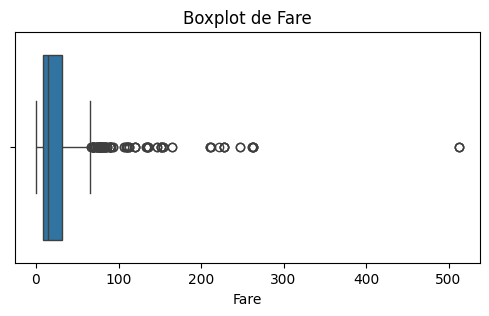

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.boxplot(x=df["Fare"])
plt.title("Boxplot de Fare")
plt.show()

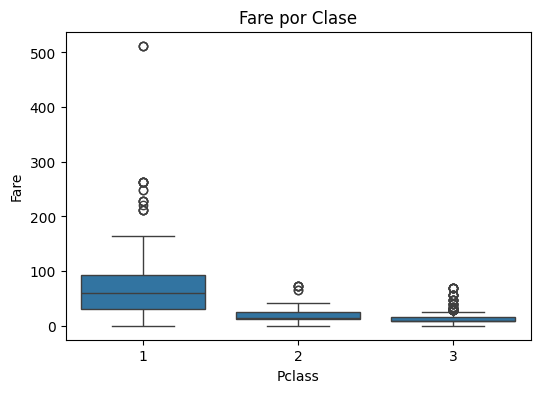

In [64]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.title("Fare por Clase")
plt.show()


<h3>Histogramas y gráficos de dispersión</h3>
<b>Histograma de Fare</b>

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.hist(df["Fare"].dropna(), bins=30)
plt.title("Histograma de Fare (Titanic)")
plt.xlabel("Fare")
plt.ylabel("Frecuencia")
plt.show()


Si vemos una cola larga hacia la derecha, significa que hay pocos casos con tarifas muy altas: posibles outliers, pero no necesariamente errores.

<b>Gráfico de dispersión</b>


In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))
plt.scatter(range(len(df)), df["Fare"])
plt.title("Dispersión de Fare por índice")
plt.xlabel("Índice (fila)")
plt.ylabel("Fare")
plt.show()


La mayoría de puntos se concentra abajo, pero algunos se van muy arriba: esos son candidatos a outliers.

<h2>Parte 2</h2>

<h3>Modelos basados en aprendizaje automático</h3>

Isolation Forest

In [2]:
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd
df = pd.read_csv("data/Titanic-Dataset.csv")

In [4]:
# Seleccionar variables numéricas
cols = ["Age", "Fare", "SibSp", "Parch"]
X = df[cols].copy()

# Cada columna se imputa sola, sin mirar las otras
imputer = SimpleImputer(strategy="median") # Busca valores NaN y los reemplaza por la mediana de la columna
scaler = StandardScaler() # Escalar evita que una variable mande solo porque está en números más grandes.

X_imp = imputer.fit_transform(X)
#fit: calcula la mediana de cada columna (ignorando NaN).
#transform: reemplaza los NaN de cada columna por esa mediana.
#Resultado: una matriz ya sin nulos (al menos en esas columnas).

X_scaled = scaler.fit_transform(X_imp)
# Calcula la media y desviación estándar por columna.
# Convierte cada columna a una escala comparable (aprox. media 0, desvío 1).


<p>Antes de aplicar un modelo, los datos deben estar completos y comparables.
La imputación resuelve los nulos; el escalado evita sesgos por magnitud.</p>

In [5]:
# Entrenar Isolation Forest

# Crear el modelo Isolation Forest
iso = IsolationForest(
    n_estimators=200,     # Número de árboles de decisión que componen el bosque.
    contamination=0.05,   # Asume que aproximadamente el 5% de los datos son anomalías
    random_state=42       # Fija la aleatoriedad para que te dé lo mismo cada vez
)

# Entrena el modelo y clasifica cada fila
pred = iso.fit_predict(X_scaled)   # -1 = outlier, 1 = normal

# Puntaje de anomalía
# Esto devuelve un score continuo de “rareza”
# Valores más altos (cercanos a 0) → normales
# Valores más bajos (negativos) → más anómalos
score = iso.decision_function(X_scaled)  # más bajo = más anómalo

# score: devuelve un array numérico, con un valor por fila: Cada número resume lo que el modelo “piensa” de esa observación.

In [6]:
# Marcar outliers en el DataFrame
df_if = df.copy()

In [7]:
df_if["outlier_if"] = (pred == -1) # pred viene de fit_predict() y trae 1 (normal) o -1 (outlier).
                                   # La expresión (pred == -1) transforma eso en True/False:
                                   # score es el “nivel de rareza” que entrega decision_function.

df_if["outlier_if"].value_counts() # Contar cuántos outliers encontró

outlier_if
False    846
True      45
Name: count, dtype: int64

In [8]:
score.shape

(891,)

In [9]:
df_if["if_score"] = score        # score es el “nivel de rareza” que entrega decision_function.

In [10]:
# Ver los casos más extremos
df_if.sort_values("if_score").head(10)[cols + ["if_score", "outlier_if"]]


Age      Fare  SibSp  Parch  if_score  outlier_if
438  64.0  263.0000      1      4 -0.154570        True
679  36.0  512.3292      0      1 -0.109410        True
737  35.0  512.3292      0      0 -0.105242        True
258  35.0  512.3292      0      0 -0.105242        True
27   19.0  263.0000      3      2 -0.092285        True
341  24.0  263.0000      3      2 -0.091248        True
88   23.0  263.0000      3      2 -0.090262        True
846   NaN   69.5500      8      2 -0.089467        True
159   NaN   69.5500      8      2 -0.089467        True
324   NaN   69.5500      8      2 -0.089467        True

<p>El modelo no detecta valores “incorrectos”,
detecta combinaciones poco frecuentes de variables.</p>

<h5>Visualización</h5>

In [ ]:
import matplotlib.pyplot as plt

# Primero dibujo todo el dataset. Después dibujo encima solo los outliers, para destacarlos.
plt.figure(figsize=(7,4))
plt.scatter(df_if["Age"], df_if["Fare"], alpha=0.6)
plt.scatter(
    df_if.loc[df_if["outlier_if"], "Age"],
    df_if.loc[df_if["outlier_if"], "Fare"],
    alpha=0.9
)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Isolation Forest – Outliers en Titanic")
plt.show()


<h3>Ejemplo práctico de detección de outliers con IQR</h3>

In [12]:
import numpy as np
import pandas as pd
# Datos de ejemplo
datos = [25, 29, 30, 31, 32, 35, 37, 120, 300]
df = pd.DataFrame(datos, columns=['Valor'])
df.head(10)


Valor
0     25
1     29
2     30
3     31
4     32
5     35
6     37
7    120
8    300

In [13]:
# Calcular Q1, Q3 e IQR
Q1 = df['Valor'].quantile(0.25)
Q3 = df['Valor'].quantile(0.75)
IQR = Q3 - Q1
# Definir límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df[(df['Valor']<limite_inferior)| (df['Valor']>limite_superior)]
print("Outliers:", outliers['Valor'].tolist())


Outliers: [120, 300]


In [14]:
outliers.head()

Valor
7    120
8    300

In [15]:
# Datos sin outliers
datos_limpios=df[(df['Valor']>=limite_inferior) & (df['Valor']<=limite_superior)]
datos_limpios

Valor
0     25
1     29
2     30
3     31
4     32
5     35
6     37

<h3>Detección de Outliers con Z-score</h3>

In [16]:
from scipy import stats
import numpy as np
import pandas as pd

# Datos de ejemplo
datos = [25, 29, 30, 31, 32, 35, 37, 120, 300]
df = pd.DataFrame(datos, columns=['Valor'])
df

Valor
0     25
1     29
2     30
3     31
4     32
5     35
6     37
7    120
8    300

In [18]:
# Calcular Z-score
z_scores = stats.zscore(df['Valor'])
df['Z-score'] = z_scores

# Identificar outliers (|z| > 3)
outliers = df[abs(df['Z-score']) > 3]
print("Outliers:", outliers['Valor'].tolist())


Outliers: []


In [19]:
outliers

Empty DataFrame
Columns: [Valor, Z-score]
Index: []

<h3>Ejemplo de Winsorización</h3>
Técnica que reemplaza valores extremos por percentiles específicos para reducir el impacto de outliers.

In [20]:
from scipy import stats
import numpy as np
import pandas as pd

np.random.seed(42)

# Valores "normales" (mayoría)
valores_normales = np.random.normal(loc=30, scale=5, size=260)

# Valores altos (cola derecha)
valores_altos = np.random.normal(loc=80, scale=10, size=30)

# Outliers extremos
outliers = np.array([150, 180, 220, 300, 400, 500, 250, 320, 450, 380])

# Unimos todo
datos = np.concatenate([valores_normales, valores_altos, outliers])

df = pd.DataFrame({"Valor": np.round(datos, 1)})
df.head()


Valor
0   32.5
1   29.3
2   33.2
3   37.6
4   28.8

In [21]:
df.shape

(300, 1)

In [22]:
# Reemplaza el 5 % más bajo y el 5 % más alto de los datos por los valores límite.”
winsorized = stats.mstats.winsorize(df['Valor'], limits=[0.05, 0.05])
df['Winsorizado'] = winsorized
print(df)

     Valor  Winsorizado
0     32.5         32.5
1     29.3         29.3
2     33.2         33.2
3     37.6         37.6
4     28.8         28.8
..     ...          ...
295  500.0         86.6
296  250.0         86.6
297  320.0         86.6
298  450.0         86.6
299  380.0         86.6

[300 rows x 2 columns]


In [23]:
df.describe()

/opt/anaconda3/envs/bootcamp/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/envs/bootcamp/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Valor  Winsorizado
count  300.000000   300.000000
mean    44.349667    36.667333
std     56.454033    17.551284
min     16.900000    22.700000
25%     27.275000    27.275000
50%     31.150000    31.150000
75%     34.825000    34.825000
max    500.000000    86.600000

In [24]:
print("Cambios (solo filas donde se modificó):")
print(df.loc[df["Valor"] != df["Winsorizado"], ["Valor", "Winsorizado"]].head(20))

print("Resumen antes vs después:")
df[["Valor", "Winsorizado"]].describe()


Cambios (solo filas donde se modificó):
     Valor  Winsorizado
13    20.4         22.7
14    21.4         22.7
37    20.2         22.7
44    22.6         22.7
49    21.2         22.7
74    16.9         22.7
79    20.1         22.7
110   20.4         22.7
130   22.2         22.7
142   22.0         22.7
189   22.4         22.7
221   20.7         22.7
223   21.9         22.7
236   19.9         22.7
254   22.4         22.7
266   96.3         86.6
270   94.4         86.6
272   91.6         86.6
282   95.9         86.6
284  101.3         86.6
Resumen antes vs después:


Valor  Winsorizado
count  300.000000   300.000000
mean    44.349667    36.667333
std     56.454033    17.551284
min     16.900000    22.700000
25%     27.275000    27.275000
50%     31.150000    31.150000
75%     34.825000    34.825000
max    500.000000    86.600000